In [1]:
import os
import gc
import sys
import glob
import copy
import numpy as np
import pandas as pd
import netCDF4 as nc
import multiprocessing as mp
from datetime import datetime, timedelta
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import cartopy.crs as ccrs

In [2]:
# To use PLUMBER2_GPP_common_utils, change directory to where it exists
os.chdir('/g/data/w97/mm3972/scripts/Land_Drought_Rainfall')
from common_utils import *

### Compare smoothing methods

In [4]:
file_cubic  = '/g/data/w97/mm3972/data/MODIS/MODIS_LAI/AUS/regrid_2_AWAP_5km_daily/remove_high_frequent_varibility/MCD15A3H.061_500m_aid0001_LAI_regridded_daily_2002-2024_cubic_spline_smooth.nc'
file_smooth = '/g/data/w97/mm3972/data/MODIS/MODIS_LAI/AUS/regrid_2_AWAP_5km_daily/31-day_smoothing_whole_series/MCD15A3H.061_500m_aid0001_LAI_regridded_daily_2002-2024_31day_smooth.nc'
# file_rm_high= "/g/data/w97/mm3972/data/MODIS/MODIS_LAI/AUS/regrid_2_AWAP_5km_daily/remove_high_frequent_varibility/MCD15A3H.061_500m_aid0001_LAI_regridded_daily_2000-2023_31day_smooth_remove_high_freq.nc"
file_rm_high= "/g/data/w97/mm3972/data/MODIS/MODIS_LAI/AUS/regrid_2_AWAP_5km_daily/remove_high_frequent_varibility/MCD15A3H.061_500m_aid0001_LAI_regridded_daily_2003-2023_remove_high_freq.nc"

f_cubic     = nc.Dataset(file_cubic)
f_smooth    = nc.Dataset(file_smooth)
f_rm_high   = nc.Dataset(file_rm_high)

time_cubic   = f_cubic.variables['time'][:].data #[:,238,793]
lai_cubic    = f_cubic.variables['Lai_500m'][:]#[:,238,793]
time_smooth  = f_smooth.variables['time'][:].data#[:,238,793]
lai_smooth   = f_smooth.variables['Lai_500m'][:]#[:,238,793]
time_rm_high = f_rm_high.variables['time'][:].data#[:,238,793]
lai_rm_high  = f_rm_high.variables['LAI'][:]#[:,238,793]

FileNotFoundError: [Errno 2] No such file or directory: '/g/data/w97/mm3972/data/MODIS/MODIS_LAI/AUS/regrid_2_AWAP_5km_daily/remove_high_frequent_varibility/MCD15A3H.061_500m_aid0001_LAI_regridded_daily_2002-2024_cubic_spline_smooth.nc'

In [ ]:
file_orig  = '/g/data/w97/mm3972/data/MODIS/MODIS_LAI/AUS/regrid_2_AWAP_5km_daily/MCD15A3H.061_500m_aid0001_LAI_regridded_daily_2002-2024.nc'

f_orig     = nc.Dataset(file_orig)
time_orig  = f_orig.variables['time'][:].data #[:,238,793]
lai_orig   = f_orig.variables['Lai_500m'][:]#[:,238,793]

In [ ]:
file_clim  = '/g/data/w97/mm3972/data/MODIS/MODIS_LAI/AUS/regrid_2_AWAP_5km_daily/MCD15A3H.061_500m_aid0001_LAI_regridded_daily_2002-2024.nc'

f_orig     = nc.Dataset(file_orig)
time_orig  = f_orig.variables['time'][:].data #[:,238,793]
lai_orig   = f_orig.variables['Lai_500m'][:]#[:,238,793]

In [1]:
mask_orig   = (time_orig >=1096+365*5) & (time_orig <=1096+365*6)
mask_cubic   = (time_cubic >=1096+365*5) & (time_cubic <=1096+365*6)
mask_smooth  = (time_smooth >=1096+365*5) & (time_smooth <=1096+365*6)
mask_rm_high = (time_rm_high >=1096+365*5) & (time_rm_high <=1096+365*6)

plt.plot(lai_orgi[mask_orig,324,323].data, c='green', label='orig') # 131,736; 238,793
plt.plot(lai_smooth[mask_smooth,324,323].data, c='blue', label='smooth') # 131,736; 238,793
# plt.plot(lai_cubic[mask_cubic,324,303].data*10., c='red', label='cubic')
plt.plot(lai_rm_high[mask_rm_high,324,323].data*10., c='orange', label='remove_high_freq') # 131,736
plt.legend()


NameError: name 'plt' is not defined

### Compare smoothing methods

In [3]:
file_orig   = '/g/data/w97/mm3972/data/MODIS/MODIS_LAI/AUS/regrid_2_AWAP_5km_daily/MCD15A3H.061_500m_aid0001_LAI_regridded_daily_2000-2023.nc'
file_smooth = '/g/data/w97/mm3972/data/MODIS/MODIS_LAI/AUS/regrid_2_AWAP_5km_daily/remove_high_frequent_varibility_method1_31-day_running_smooth/MCD15A3H.061_500m_aid0001_LAI_regridded_daily_2000-2023_31day_smooth.nc'
file_rm_high= '/g/data/w97/mm3972/data/MODIS/MODIS_LAI/AUS/regrid_2_AWAP_5km_daily/remove_high_frequent_varibility_method2_smooth_anomaly/MCD15A3H.061_500m_aid0001_LAI_regridded_daily_2000-2023_remove_high_freq.nc'


In [5]:
f_orig       = nc.Dataset(file_orig)
f_smooth     = nc.Dataset(file_smooth)
f_rm_high    = nc.Dataset(file_rm_high)

time_orig    = f_orig.variables['time'][:].data #[:,238,793]
lai_orig     = f_orig.variables['LAI'][:]#[:,238,793]
time_smooth  = f_smooth.variables['time'][:].data#[:,238,793]
lai_smooth   = f_smooth.variables['LAI'][:]#[:,238,793]
time_rm_high = f_rm_high.variables['time'][:].data#[:,238,793]
lai_rm_high  = f_rm_high.variables['LAI'][:]#[:,238,793]

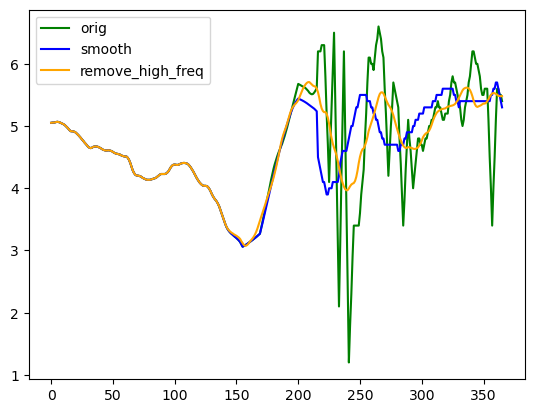

In [14]:
mask_orig    = (time_orig >=365*2) & (time_orig <=365*3)
mask_smooth  = (time_smooth >=365*2) & (time_smooth <=365*3)
mask_rm_high = (time_rm_high >=365*2) & (time_rm_high <=365*3)

plt.plot(lai_orig[mask_orig,131,736].data, c='green', label='orig') # 131,736; 238,793; 324,323
plt.plot(lai_smooth[mask_smooth,131,736].data, c='blue', label='smooth') # 131,736; 238,793
plt.plot(lai_rm_high[mask_rm_high,131,736].data, c='orange', label='remove_high_freq') # 131,736
plt.legend()


### Compare processed LAI with PLUMBER2 LAI

AU-ASM
AU-Cpr
AU-Cum
AU-DaP
AU-DaS
AU-Dry
AU-Emr
AU-GWW
AU-Gin
AU-How
AU-Lit
AU-Rig
AU-Rob
AU-Sam
AU-Stp
AU-TTE
AU-Tum
AU-Whr
AU-Wrr
AU-Ync


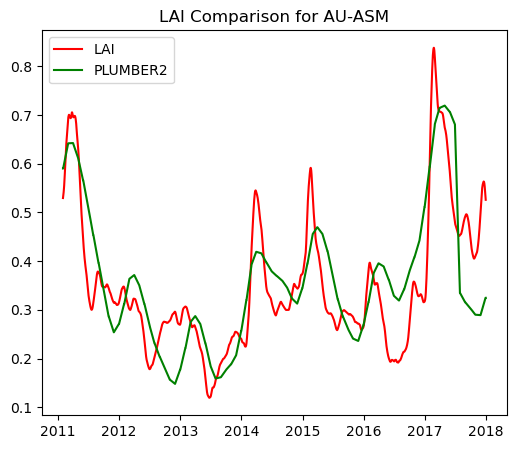

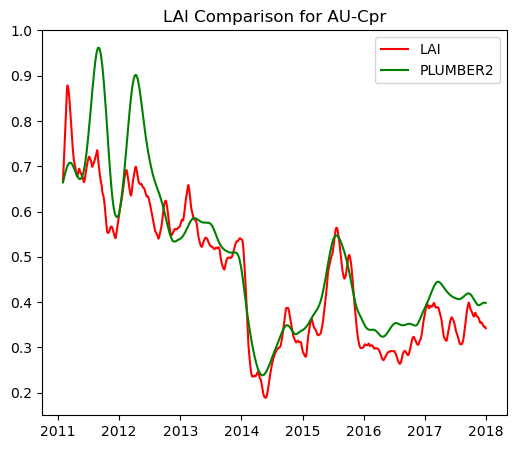

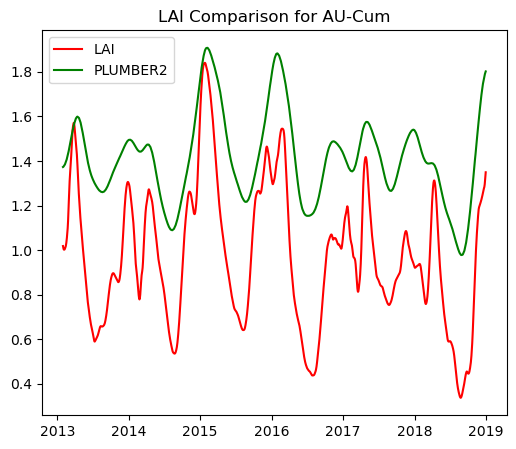

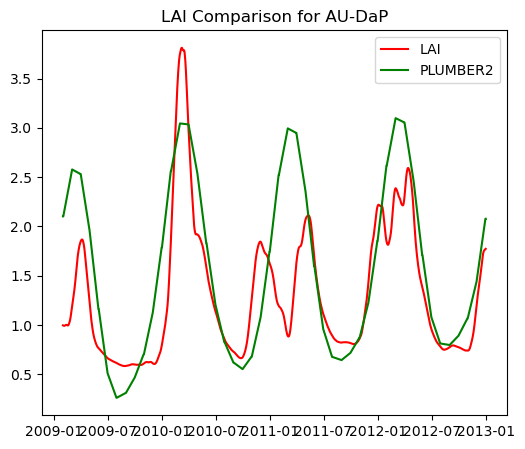

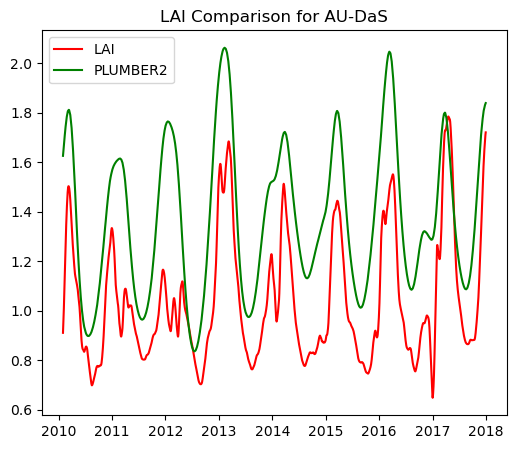

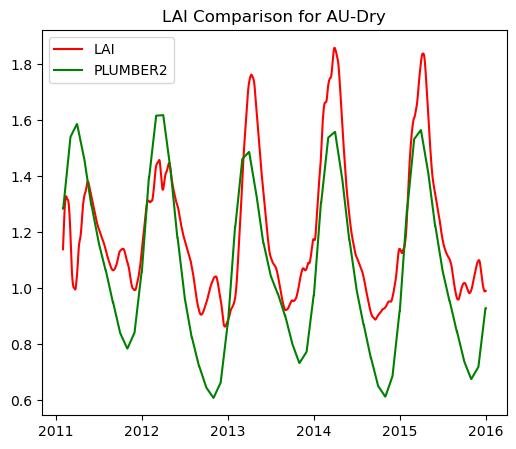

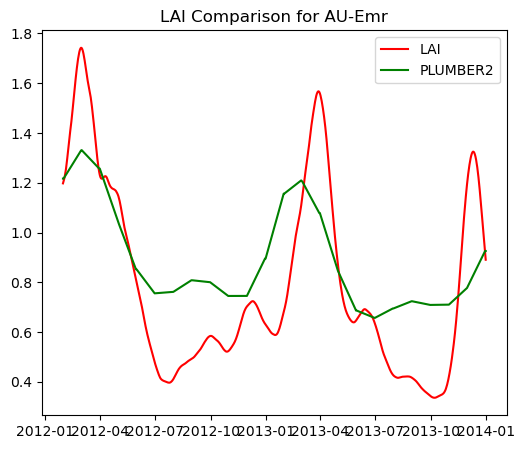

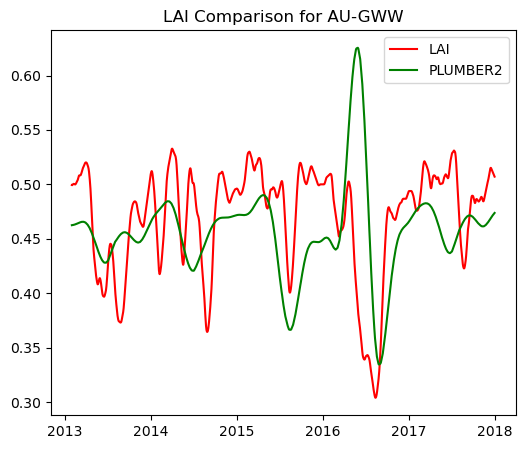

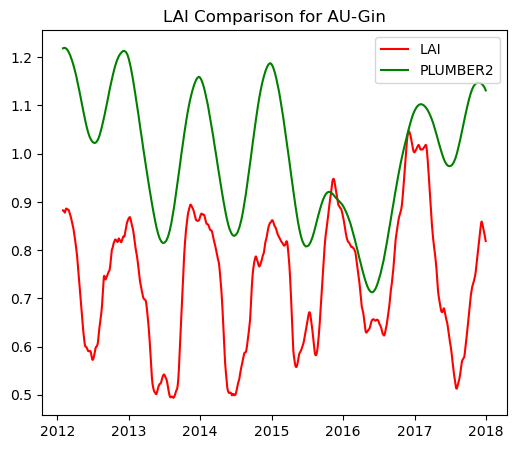

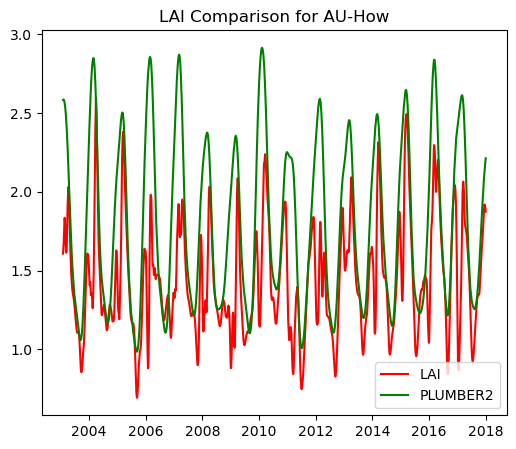

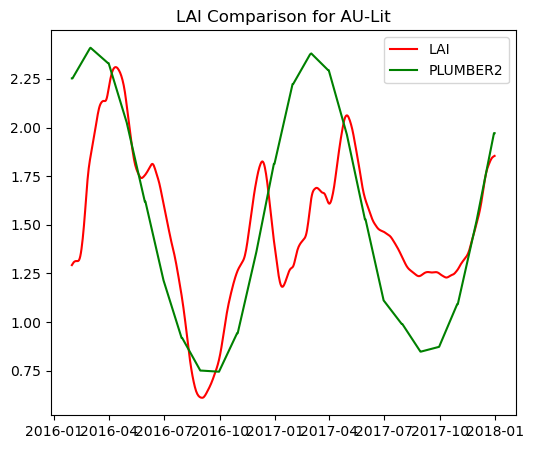

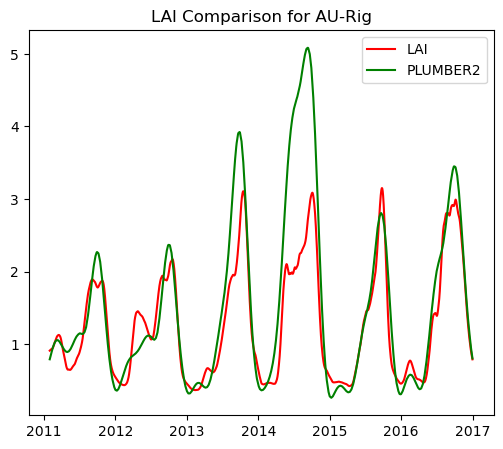

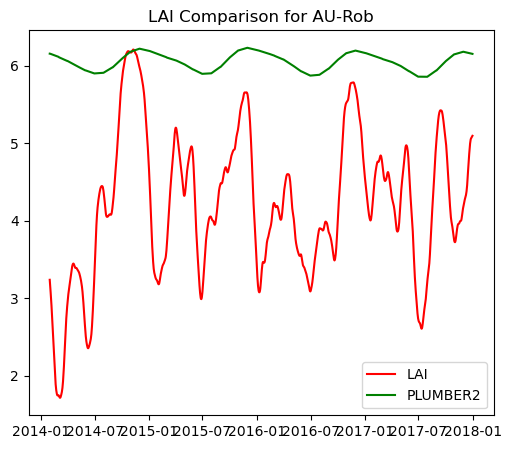

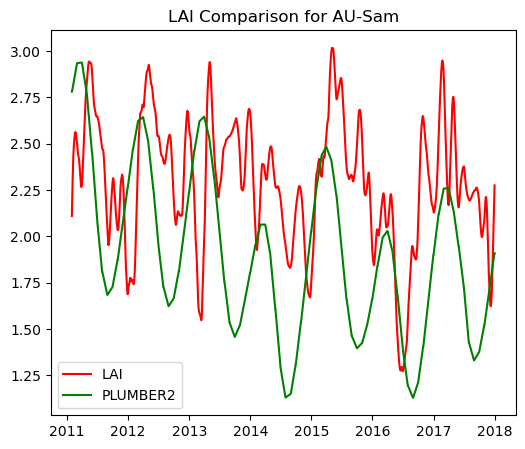

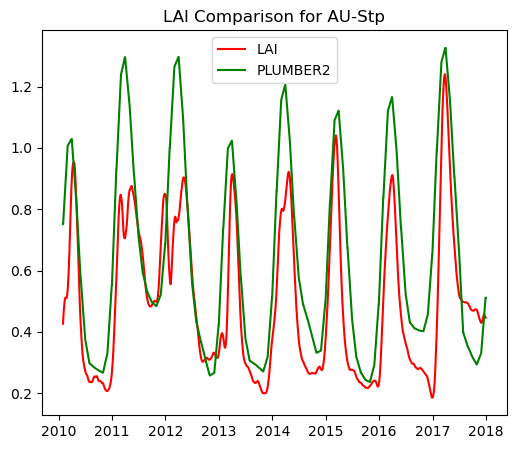

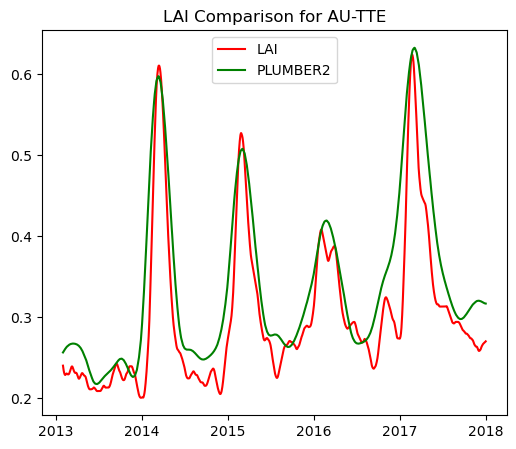

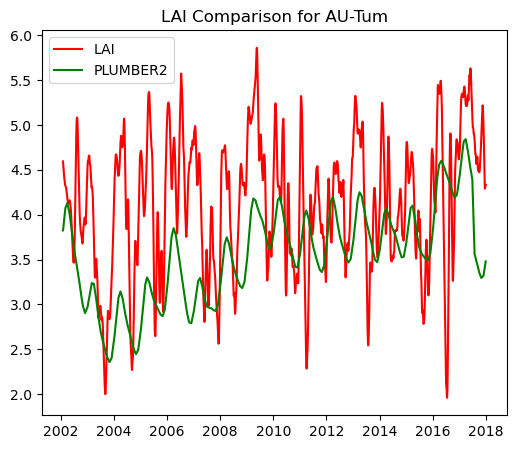

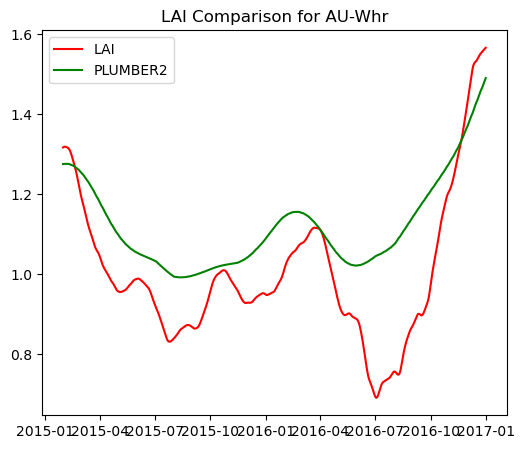

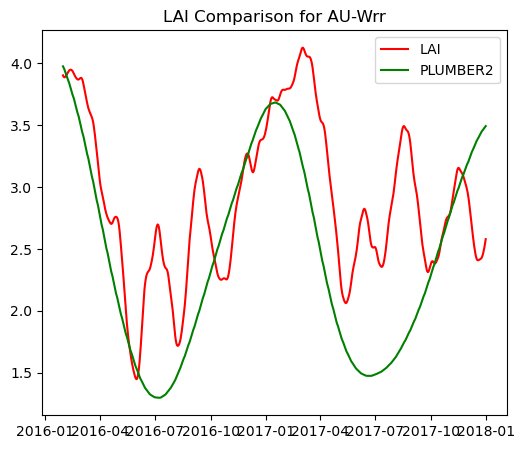

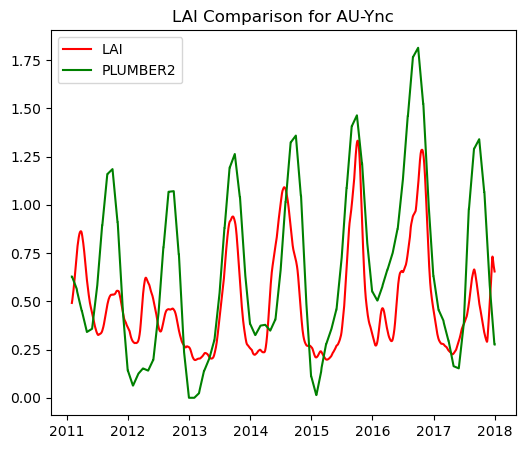

In [7]:
var_name = 'LAI'

file_LAI  = '/g/data/w97/mm3972/data/MODIS/MODIS_LAI/AUS/regrid_2_AWAP_5km_daily/remove_high_frequent_varibility_method2_smooth_anomaly/MCD15A3H.061_500m_aid0001_LAI_regridded_daily_2000-2023_remove_high_freq.nc'

# Read CABLE output
f_LAI     = nc.Dataset(f'{file_LAI}')
MODIS_LAI = f_LAI.variables['LAI'][:]
latitude  = f_LAI.variables['latitude'][:]
longitude = f_LAI.variables['longitude'][:]

# Read CABLE time
LAI_time = nc.num2date(f_LAI.variables['time'][:], 
                       f_LAI.variables['time'].units, 
                         only_use_cftime_datetimes=False,
                         only_use_python_datetimes=True)


if var_name == 'LAI':
    message = 'Met'
else:
    message = 'Flux'

PLUMBER2_path      = f'/g/data/w97/mm3972/data/Fluxnet_data/Post-processed_PLUMBER2_outputs/Nc_files/{message}'
PLUMBER2_AU_files  = [  f'AU-ASM_2011-2017_OzFlux_{message}.nc',      
                        f'AU-Cpr_2011-2017_OzFlux_{message}.nc',     
                        f'AU-Cum_2013-2018_OzFlux_{message}.nc',       
                        f'AU-DaP_2009-2012_OzFlux_{message}.nc',       
                        f'AU-DaS_2010-2017_OzFlux_{message}.nc',       
                        f'AU-Dry_2011-2015_OzFlux_{message}.nc',       
                        f'AU-Emr_2012-2013_OzFlux_{message}.nc',       
                        f'AU-GWW_2013-2017_OzFlux_{message}.nc',       
                        f'AU-Gin_2012-2017_OzFlux_{message}.nc',       
                        f'AU-How_2003-2017_OzFlux_{message}.nc',       
                        f'AU-Lit_2016-2017_OzFlux_{message}.nc',       
                        f'AU-Rig_2011-2016_OzFlux_{message}.nc',       
                        f'AU-Rob_2014-2017_OzFlux_{message}.nc',       
                        f'AU-Sam_2011-2017_OzFlux_{message}.nc',       
                        f'AU-Stp_2010-2017_OzFlux_{message}.nc',       
                        f'AU-TTE_2013-2017_OzFlux_{message}.nc',       
                        f'AU-Tum_2002-2017_OzFlux_{message}.nc',       
                        f'AU-Whr_2015-2016_OzFlux_{message}.nc',       
                        f'AU-Wrr_2016-2017_OzFlux_{message}.nc',       
                        f'AU-Ync_2011-2017_OzFlux_{message}.nc',
                        # f'AU-Otw_2009-2010_OzFlux_{message}.nc',     
                        # f'AU-Cow_2010-2015_OzFlux_{message}.nc',         
                        # f'AU-Ctr_2010-2017_OzFlux_{message}.nc',         
                        ]

site_characters   = pd.read_csv('/g/data/w97/mm3972/scripts/PLUMBER2/LSM_GPP_PLUMBER2/txt/site_character.csv')

# Correct filtering for Australian sites
au_site_characters = site_characters[site_characters['site_name'].str.contains('AU')]
au_site_list = np.unique(au_site_characters['site_name'])


for PLUMBER2_AU_file in PLUMBER2_AU_files:
    
    site_name = PLUMBER2_AU_file.split('_')[0] 
    print(site_name)

    # Read PLUMBER2 file
    if var_name == 'LAI':
        f_PLUMBER2 = nc.Dataset(f'{PLUMBER2_path}/{PLUMBER2_AU_file}') 
    else:
        f_PLUMBER2 = nc.Dataset(f'{PLUMBER2_path}/{PLUMBER2_AU_file}')
    df_P2 = pd.DataFrame(f_PLUMBER2.variables[var_name][:,0,0].data, columns=[var_name])

    # Read PLUMBER2 time
    P2_time = nc.num2date(f_PLUMBER2.variables['time'][:], 
                          f_PLUMBER2.variables['time'].units, 
                          only_use_cftime_datetimes=False,
                          only_use_python_datetimes=True)
    ntime = len(P2_time)

    year  = np.zeros(ntime)
    month = np.zeros(ntime)
    day   = np.zeros(ntime)
    
    # Extract year, month, day
    for tt, t in enumerate(P2_time):
        year[tt]  = t.year
        month[tt] = t.month
        day[tt]   = t.day

    df_P2['year']  = year
    df_P2['month'] = month
    df_P2['day']   = day
    df_P2 = df_P2.groupby(['year', 'month', 'day']).mean(numeric_only=True).reset_index()
    
    # Get lat and lon for the site
    lat = au_site_characters.loc[au_site_characters['site_name'] == site_name, 'lat'].values[0]
    lon = au_site_characters.loc[au_site_characters['site_name'] == site_name, 'lon'].values[0]
    # print(lat, lon)

    # Find the indices of the nearest pixels to lat and lon.
    lat_idx = np.argmin(np.abs(latitude - lat))
    lon_idx = np.argmin(np.abs(longitude - lon))
    # print(lat_idx, lon_idx)

    # Read the climate_class value of the nearest pixel.
    df_LAI = pd.DataFrame(MODIS_LAI[:, lat_idx, lon_idx].data, columns=[var_name])

    # Subset CABLE data to match PLUMBER2 time range
    df_LAI     = df_LAI[(LAI_time >= P2_time[0]) & (LAI_time <= P2_time[-1])]
    LAI_time_tmp = LAI_time[(LAI_time >= P2_time[0]) & (LAI_time <= P2_time[-1])]
    # Print lengths of CABLE and PLUMBER2 data for validation
    # print(df_LAI)

    # ================== Start Plotting =================
    fig, ax  = plt.subplots(figsize=(6,5))
    
    # Plot comparison of Qle for CABLE and PLUMBER2
    ax.plot(LAI_time_tmp,df_LAI[var_name].rolling(window=30).mean().values, c='red', label='LAI')
    ax.plot(LAI_time_tmp,df_P2[var_name].rolling(window=30).mean().values, c='green', label='PLUMBER2')
    ax.legend()
    ax.set_title(f'{var_name} Comparison for {site_name}')

    plt.savefig(f'./remove_high_frequent_varibility_LAI_vs_Flux_site_{var_name}_{site_name}.png',dpi=300)
